# Сделать модель котоорая по пов. и реагентам предсказывает пит. 
Как идея!!!!!

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyexcel as p

from datetime import timedelta, datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, LinearSVC
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_validate
from sklearn.metrics import *


# Подгрузка и обработка данных

In [10]:
# df_2017 = pd.read_csv('Line_1_2017_2019.csv', sep=";", encoding='latin-1', header=None).drop(0)
# df_2017_1 = pd.read_csv('Line_1_2017_2019_1.csv', sep=";", encoding='latin-1', header=None)
# df_2020 = pd.read_csv('Line_1_2020_2021.csv', sep=";", encoding='latin-1', header=None).drop(0)
# df_2020_1 = pd.read_csv('Line_1_2020_2021_1.csv', sep=";", encoding='latin-1', header=None)

In [11]:
df_1 = pd.concat([df_2020_1, df_2017_1]).drop(df_2017.columns[14], axis=1)
df = pd.concat([df_2020, df_2017]).drop(df_2017.columns[14], axis=1)
df_1[0] = df_1[0].str.replace('ï»¿', '')
df[0] = df[0].str.replace('ï»¿', '')

NameError: name 'df_2020_1' is not defined

In [1]:
df_new = pd.read_excel('data_new_v1.xlsx', header=0)

In [13]:
df_new.head(10)

,chromasity,feculence,ph,mn,fe,alkalinity,nh4,lime,PAA_kk,PAA_f,sa,permanganate,quality
0,64,8.5,7.3,0,2.6,0.70,0.00,10,0.0,0.0,13.14,0.0,0
1,64,8.5,7.3,0,2.6,0.70,0.00,10,0.0,0.0,13.14,0.0,0
2,53,9,7.3,0,2.6,0.75,0.00,10,0.0,0.0,13.11,0.0,0
3,53,9,7.3,0,2.6,0.75,0.00,10,0.0,0.0,13.11,0.0,0
4,53,9,7.3,0,2.6,0.75,0.00,10,0.0,0.0,13.11,0.0,0
5,64,8.6,7.3,0,2.5,0.75,0.00,10,0.0,0.0,13.14,0.0,0
6,64,8.6,7.3,0,2.5,0.75,0.00,10,0.0,0.0,13.14,0.0,0
7,64,8.6,7.3,0,2.5,0.75,0.00,10,0.0,0.0,13.14,0.0,1
8,50,8.6,7.2,0,2.5,0.75,0.00,10,0.0,0.0,13.14,0.0,1
9,57,8.9,7.4,0,2.5,0.70,0.15,10,0.0,0.0,13.11,0.0,1


In [3]:
# to datetime
df_new.describe()

,chromasity,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate,quality
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.0,304.000000,304.000000,304.000000,304.000000,304.000000
mean,50.888158,13.907895,0.933882,0.643289,4.533553,0.887007,0.488289,10.0,0.055724,0.082072,9.743490,1.867434,0.585526
std,8.776694,9.727013,2.438539,3.794642,1.866058,0.113032,0.274425,0.0,0.083726,0.117944,1.712875,1.732668,0.493443
min,26.000000,8.000000,0.000000,0.000000,2.500000,0.700000,0.000000,10.0,0.000000,0.000000,7.134000,0.000000,0.000000
25%,47.000000,9.200000,0.000000,0.070000,2.800000,0.800000,0.210000,10.0,0.000000,0.000000,8.637750,0.000000,0.000000
50%,51.000000,12.300000,0.000000,0.510000,4.000000,0.900000,0.520000,10.0,0.000000,0.000000,9.120500,1.600000,1.000000
75%,56.000000,16.500000,0.000000,0.590000,6.125000,1.000000,0.710000,10.0,0.100000,0.190000,10.346000,3.100000,1.000000
max,86.000000,154.000000,7.400000,66.000000,9.400000,1.150000,1.240000,10.0,0.250000,0.400000,13.311000,5.200000,1.000000


In [2]:
# df_new = df_new.drop('Время', axis=1)
df_new = df_new.replace(',', '.', regex = True)
df_new.columns = ['chromasity', 'feculence', 
                'ph','mn', 'fe', 'alkanility', 'nh4', 'lime', 'PAA kk', 'PAA f','sa', 
                'permanganate', 'quality']
df_new.fillna(0, inplace=True)
# df_new['date'] = df_new['date'].str.replace('г.', '').replace('.','-')
# df_new['date'] = pd.to_datetime(df_new['date'], format='%d%m%Y')


df_new.iloc[:,1:] = df_new.iloc[:,1:].astype(float)

C:\Users\Evgeny Kamskov\AppData\Local\Temp\ipykernel_21748\3035567128.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_new.iloc[:,1:] = df_new.iloc[:,1:].astype(float)


<AxesSubplot: >

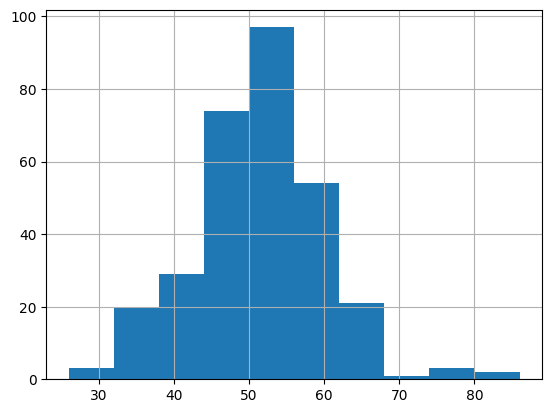

In [18]:
df_new['chromasity'].hist()

In [19]:
df_new['quality'].replace(1, 2).replace(0, 1).replace(1,0)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
299    0.0
300    2.0
301    2.0
302    2.0
303    0.0
Name: quality, Length: 304, dtype: float64

In [20]:
# for df_tmp in [df, df_1]:
#     df_tmp.iloc[:,1:] = df_tmp.iloc[:,1:].replace(',', '.', regex = True)
#     df_tmp.columns = ['date','chromasity', 'chromasity_max', 'feculence', 
#                       'ph','mn', 'fe', 'alkanility', 'nh4', 'sa', 
#                       'oca', 'nh4_1', 'lime', 'permanganate']
    
#     df_tmp['date'] = pd.to_datetime(df_tmp['date'].replace('ï»¿', ''), dayfirst=True)
#     df_tmp.iloc[:,1:] = df_tmp.iloc[:,1:].astype(float)

# Визуализация данных

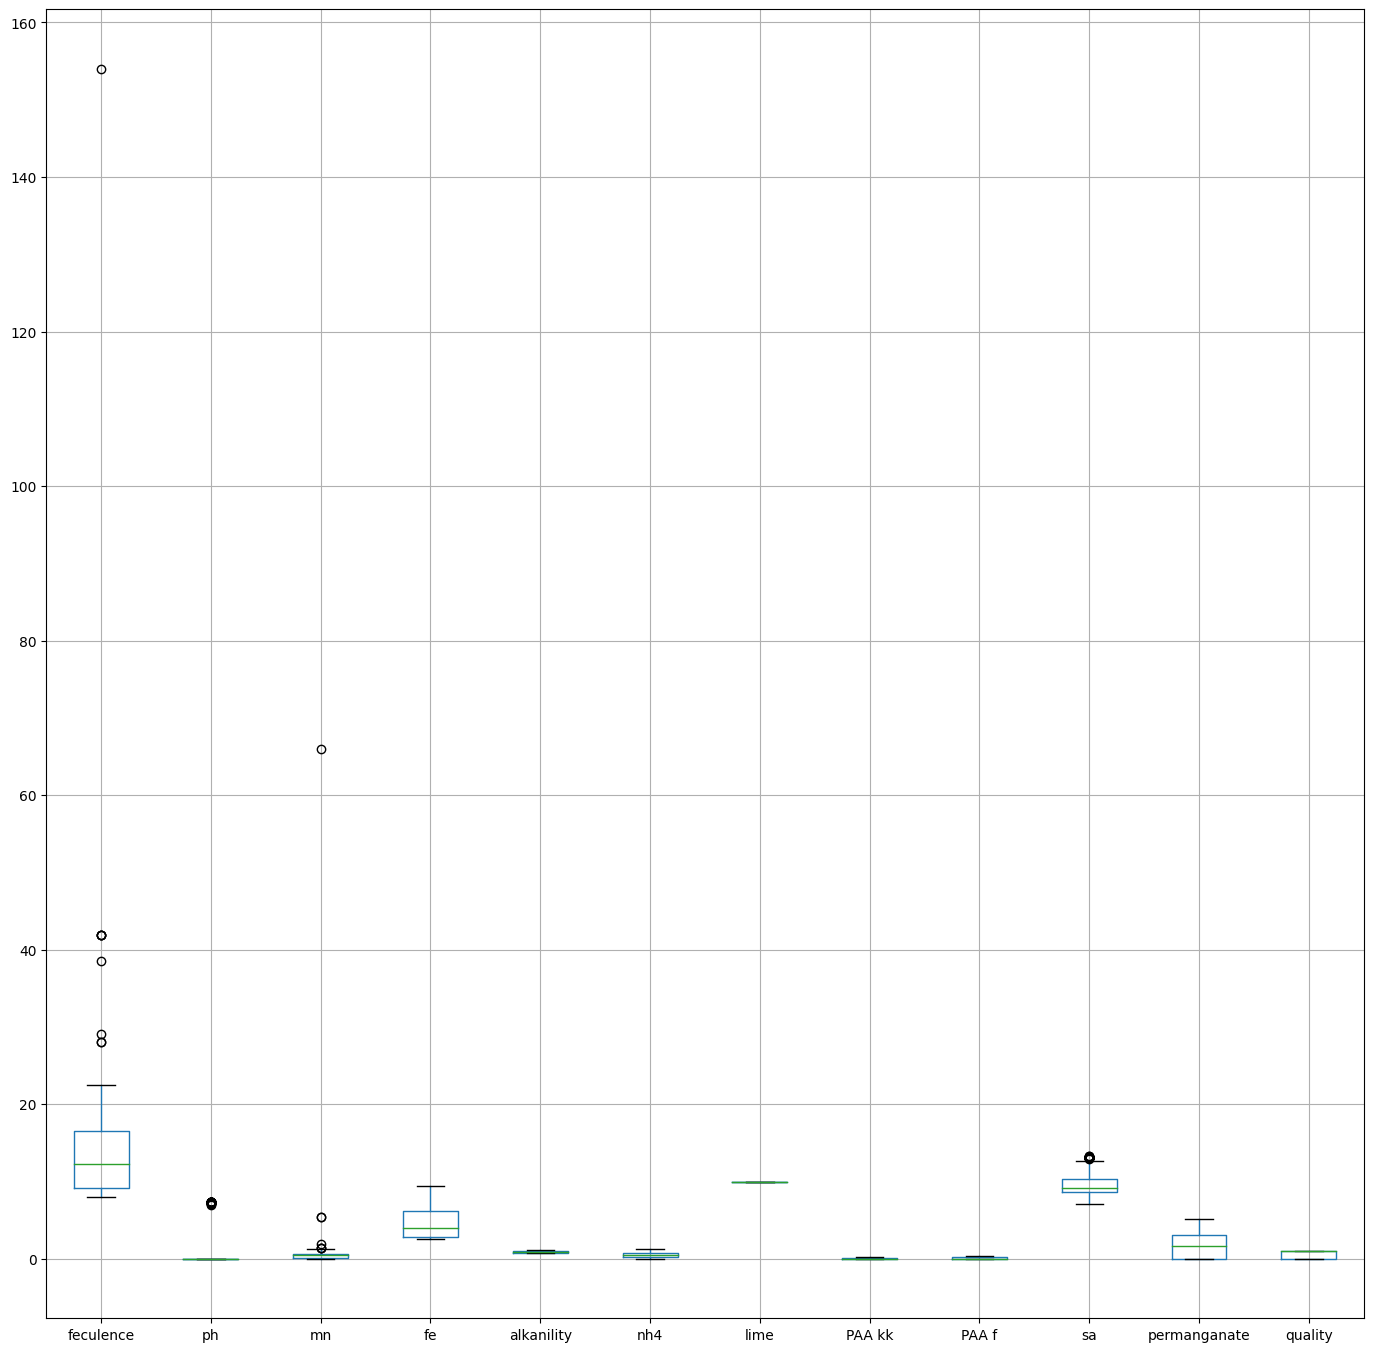

In [21]:
df_new.iloc[:,1:].boxplot(figsize=(17,17))
plt.show()

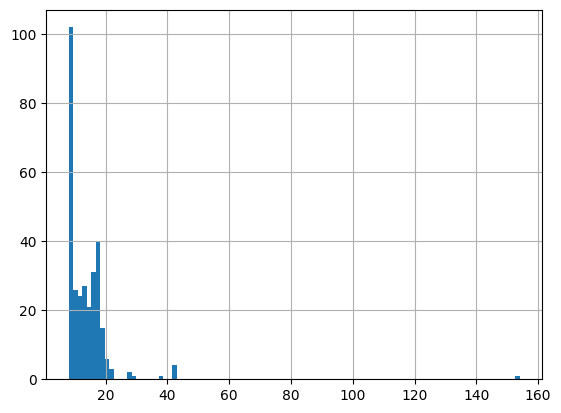

In [22]:
df_new["feculence"].hist(bins=100)
plt.show()

Проверка нормативных показателей

In [23]:
df_new[((df_new['feculence']) > 0 & (df_new['feculence'] < 1.5))].shape
df_new[((df_new['mn']) > 0)].shape



(284, 13)

In [ ]:
# create dataframe:         

# Обработка данных (отрезаем выбросы)

In [24]:
# df_new = df_new[((df_new['feculence']) < 60)]
# df_new = df_new[((df_new['mn']) < 60)]

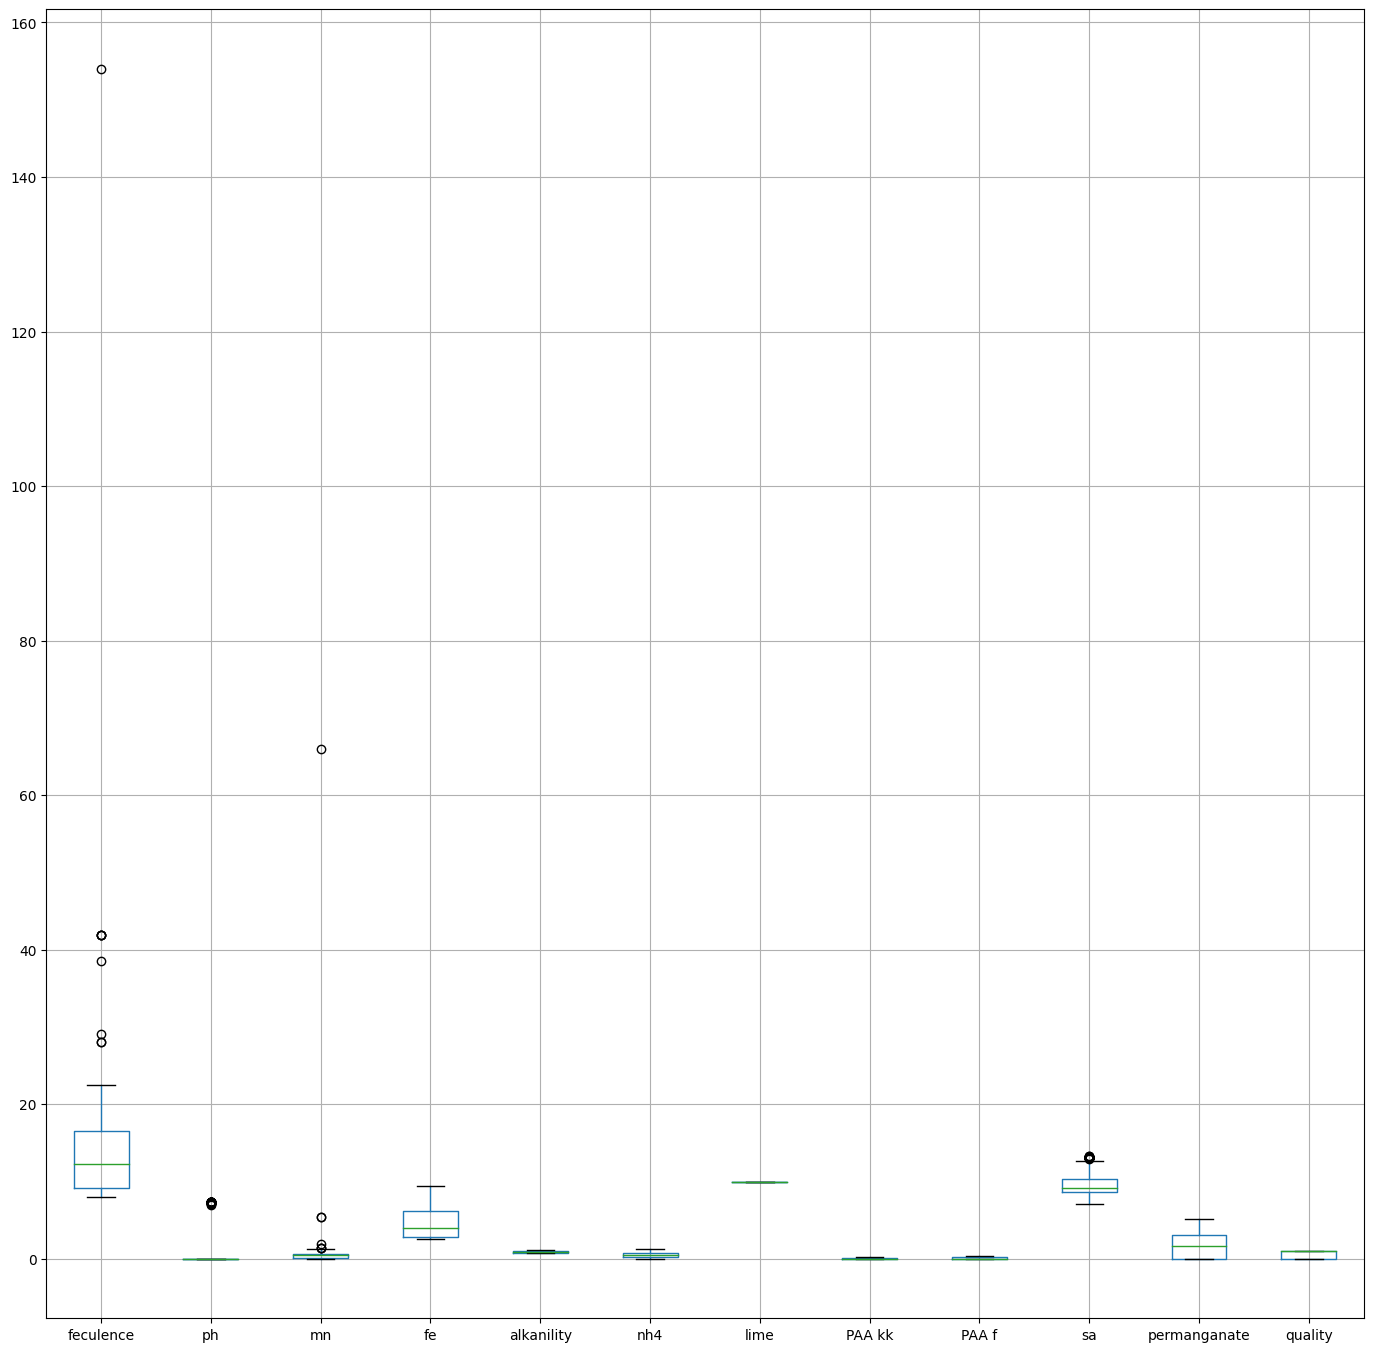

In [25]:
df_new.iloc[:,1:].boxplot(figsize=(17,17))
plt.show()

In [26]:
from scipy import stats


z = np.abs(stats.zscore(df_new['chromasity']))

indexes = df_new[(z>3)].index
# data_clean = data[(z<3).all(axis=1)]

for i in indexes:
    print(df_new.loc[i]['chromasity'], ' -> ', df_new.loc[i-5:i+5]['chromasity'].mean())
    df_new.iloc[i, df_new.columns.get_loc('chromasity')] = df_new.loc[i-5:i+5]['chromasity'].mean()        # Заменяем значение выброса на среднее  соседних значений
    # print(df_new.loc[i]['chromasity'], ' -> ', df_new.loc[i-5:i+5]['chromasity'].mean())


86.0  ->  58.09090909090909
86.0  ->  55.64462809917356


In [27]:
from scipy import stats


z = np.abs(stats.zscore(df_new['feculence']))

indexes = df_new[(z>3)].index
# data_clean = data[(z<3).all(axis=1)]

for i in indexes:
    print(df_new.loc[i]['feculence'], ' -> ', df_new.loc[i-5:i+5]['feculence'].mean())
    df_new.iloc[i, df_new.columns.get_loc('feculence')] = df_new.loc[i-5:i+5]['feculence'].mean()        # Заменяем значение выброса на среднее  соседних значений
    # print(df_new.loc[i]['chromasity'], ' -> ', df_new.loc[i-5:i+5]['chromasity'].mean())

154.0  ->  41.86363636363637


In [28]:
from scipy import stats


z = np.abs(stats.zscore(df_new['mn']))

indexes = df_new[(z>3)].index
# data_clean = data[(z<3).all(axis=1)]

for i in indexes:
    print(df_new.loc[i]['ph'], ' -> ', df_new.loc[i-5:i+5]['mn'].mean())
    df_new.iloc[i, df_new.columns.get_loc('mn')] = df_new.loc[i-5:i+5]['mn'].mean()        # Заменяем значение выброса на среднее  соседних значений
    # print(df_new.loc[i]['chromasity'], ' -> ', df_new.loc[i-5:i+5]['chromasity'].mean())

0.0  ->  11.56


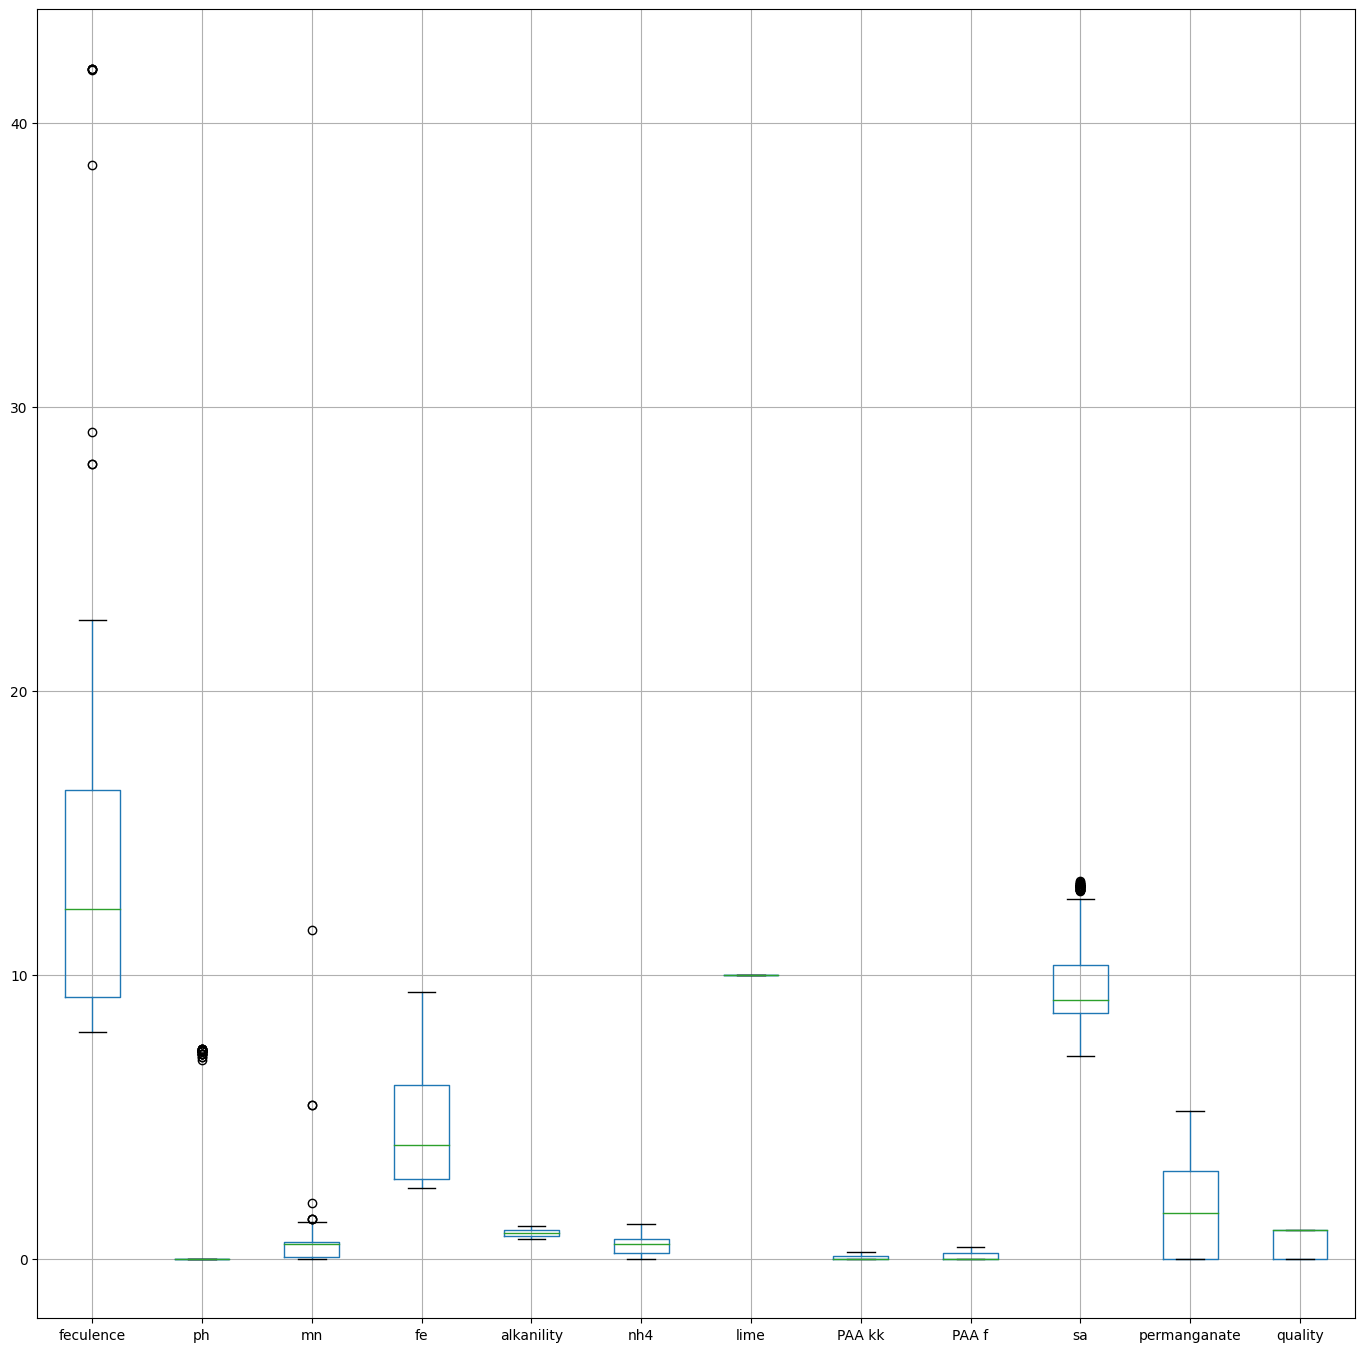

In [29]:
df_new.iloc[:,1:].boxplot(figsize=(17,17))
plt.show()

In [30]:
indexes

Int64Index([303], dtype='int64')

In [31]:
df_new


,chromasity,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate,quality
0,64.0,8.5,7.3,0.00,2.6,0.70,0.00,10.0,0.00,0.0,13.140,0.0,0.0
1,64.0,8.5,7.3,0.00,2.6,0.70,0.00,10.0,0.00,0.0,13.140,0.0,0.0
2,53.0,9.0,7.3,0.00,2.6,0.75,0.00,10.0,0.00,0.0,13.110,0.0,0.0
3,53.0,9.0,7.3,0.00,2.6,0.75,0.00,10.0,0.00,0.0,13.110,0.0,0.0
4,53.0,9.0,7.3,0.00,2.6,0.75,0.00,10.0,0.00,0.0,13.110,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,67.0,20.3,0.0,0.67,7.8,1.15,1.24,10.0,0.21,0.2,8.119,5.2,0.0
300,32.0,18.4,0.0,0.68,7.1,1.10,0.91,10.0,0.25,0.2,9.556,5.2,1.0
301,32.0,18.4,0.0,0.68,7.1,1.10,0.91,10.0,0.25,0.2,9.556,5.2,1.0
302,32.0,18.4,0.0,0.68,7.1,1.10,0.91,10.0,0.25,0.2,9.556,5.2,1.0


# Визуалиация корреляций фичей

c:\users\evgeny kamskov\appdata\local\programs\python\python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\users\evgeny kamskov\appdata\local\programs\python\python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\users\evgeny kamskov\appdata\local\programs\python\python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


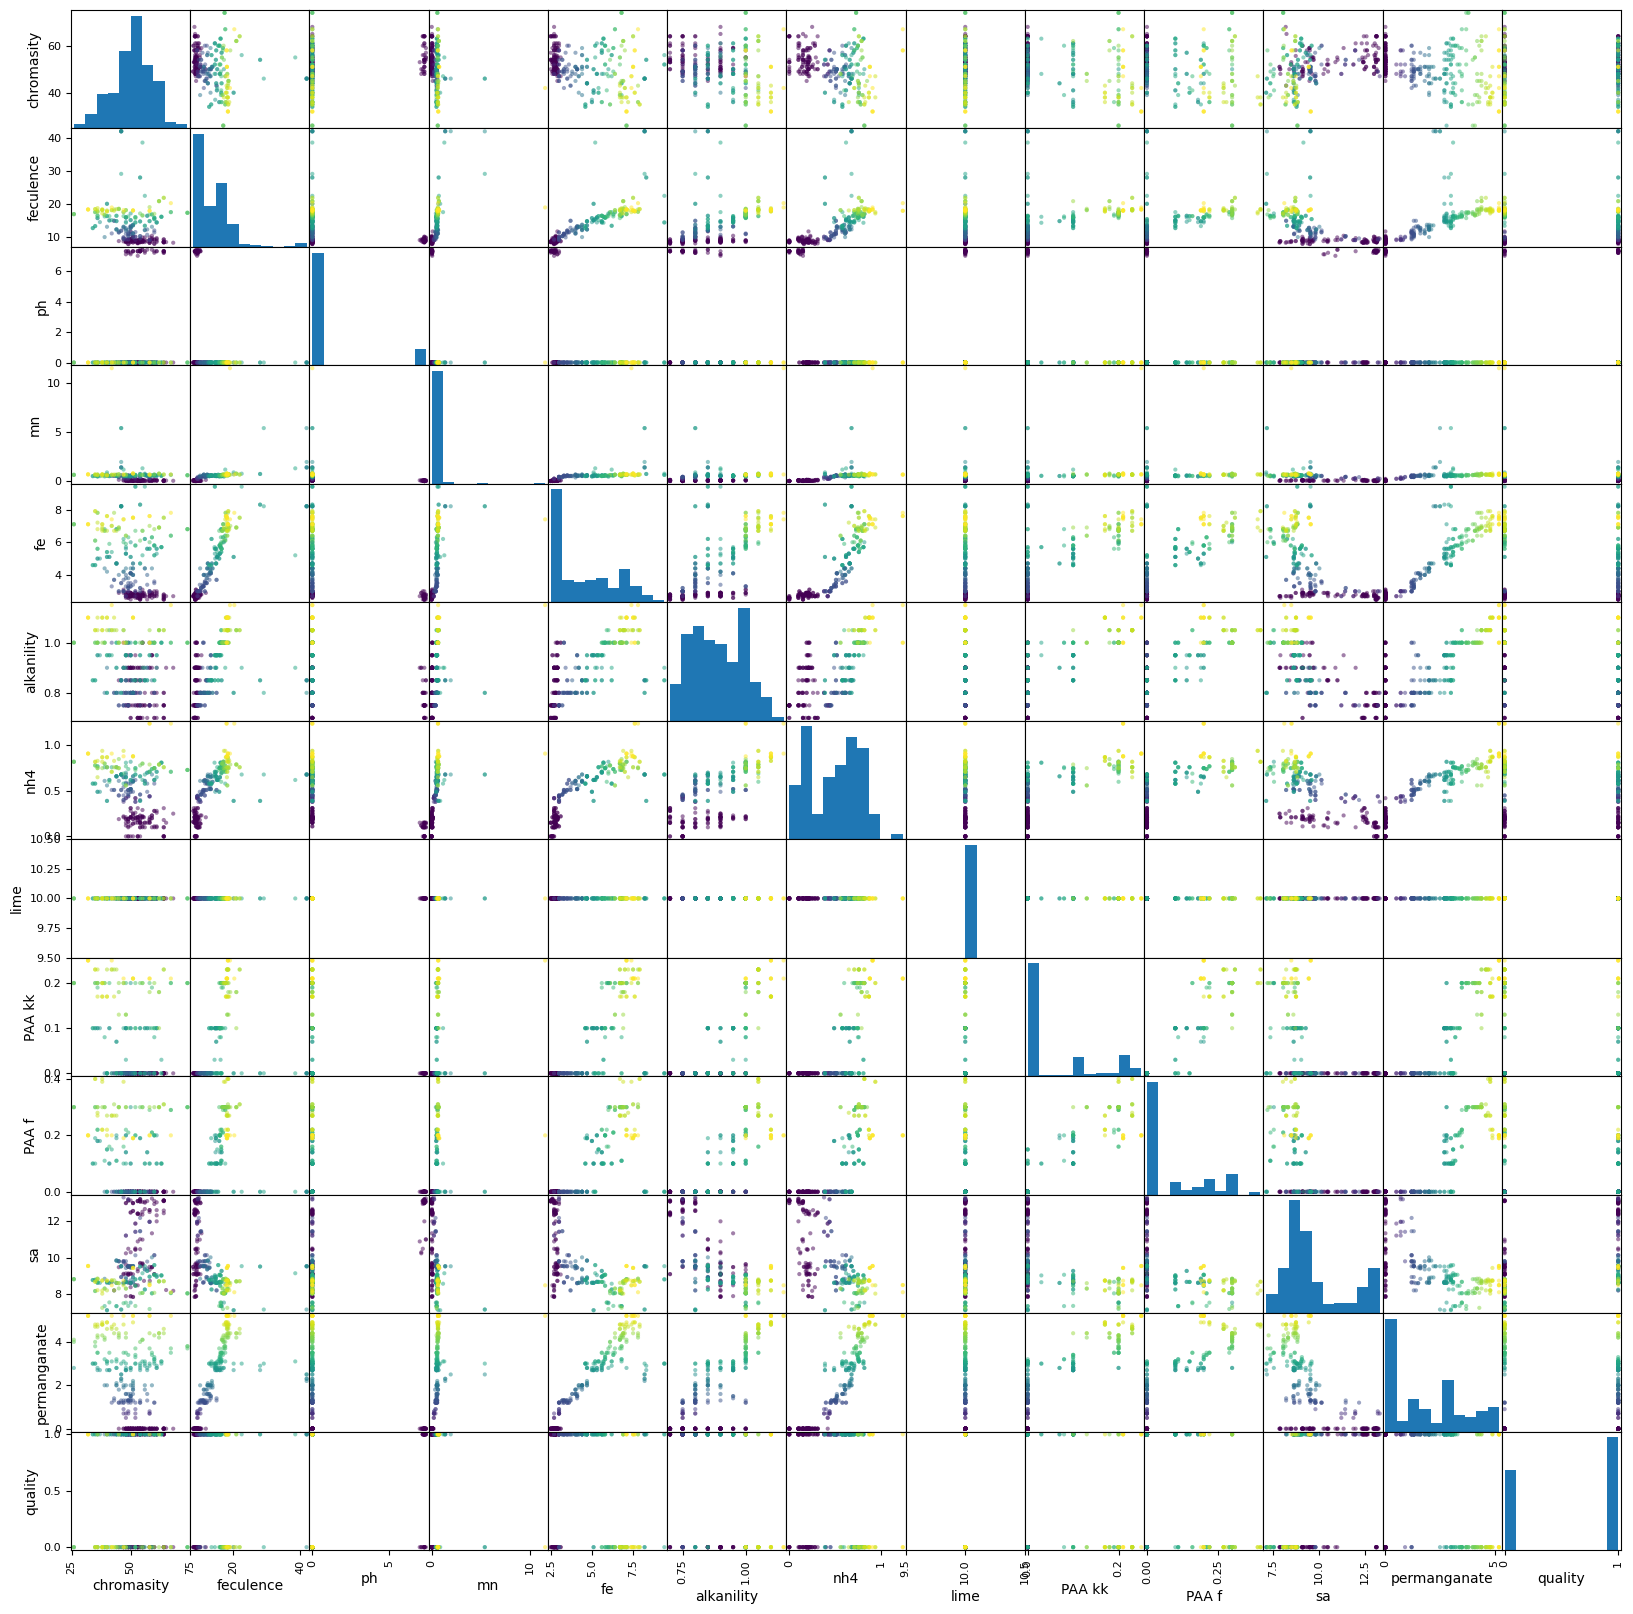

In [32]:
from pandas.plotting import scatter_matrix 
import plotly.express as px

pd.plotting.scatter_matrix(df_new, c=df_new["permanganate"], figsize=(20,20), alpha=0.5)
plt.show()

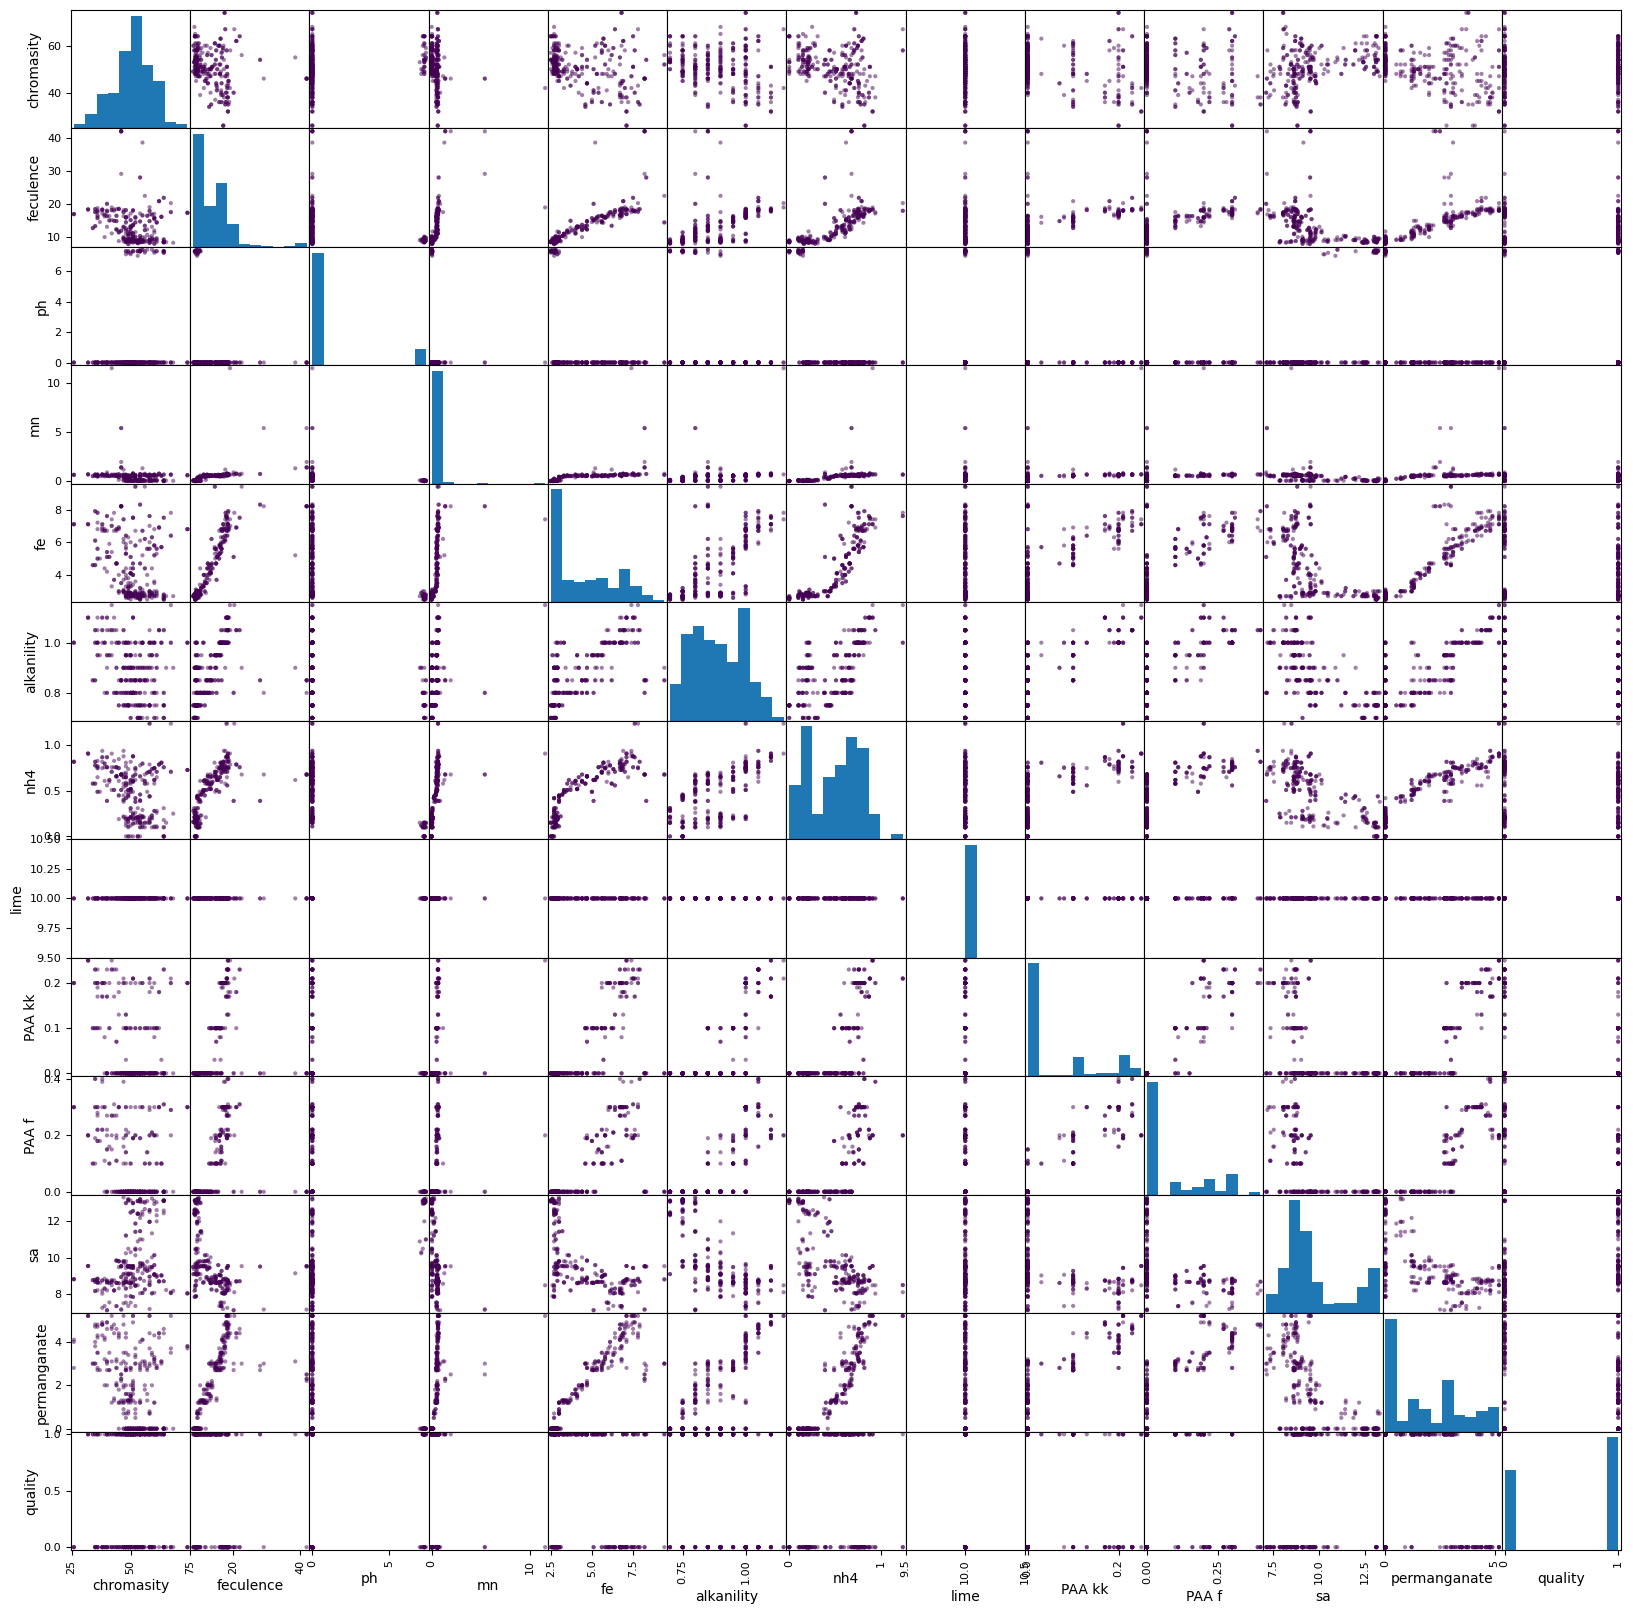

In [33]:
pd.plotting.scatter_matrix(df_new, c=df_new["lime"], figsize=(20,20), alpha=0.5)
plt.show()

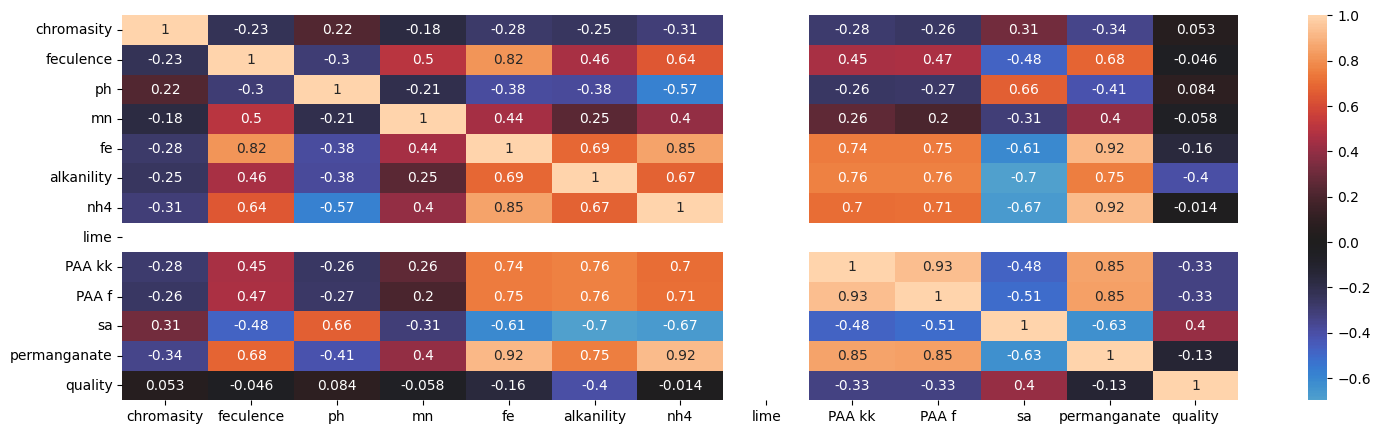

In [34]:
plt.figure(figsize=(18, 5))
sns.heatmap(df_new.corr(), center=0, annot=True)
plt.show()

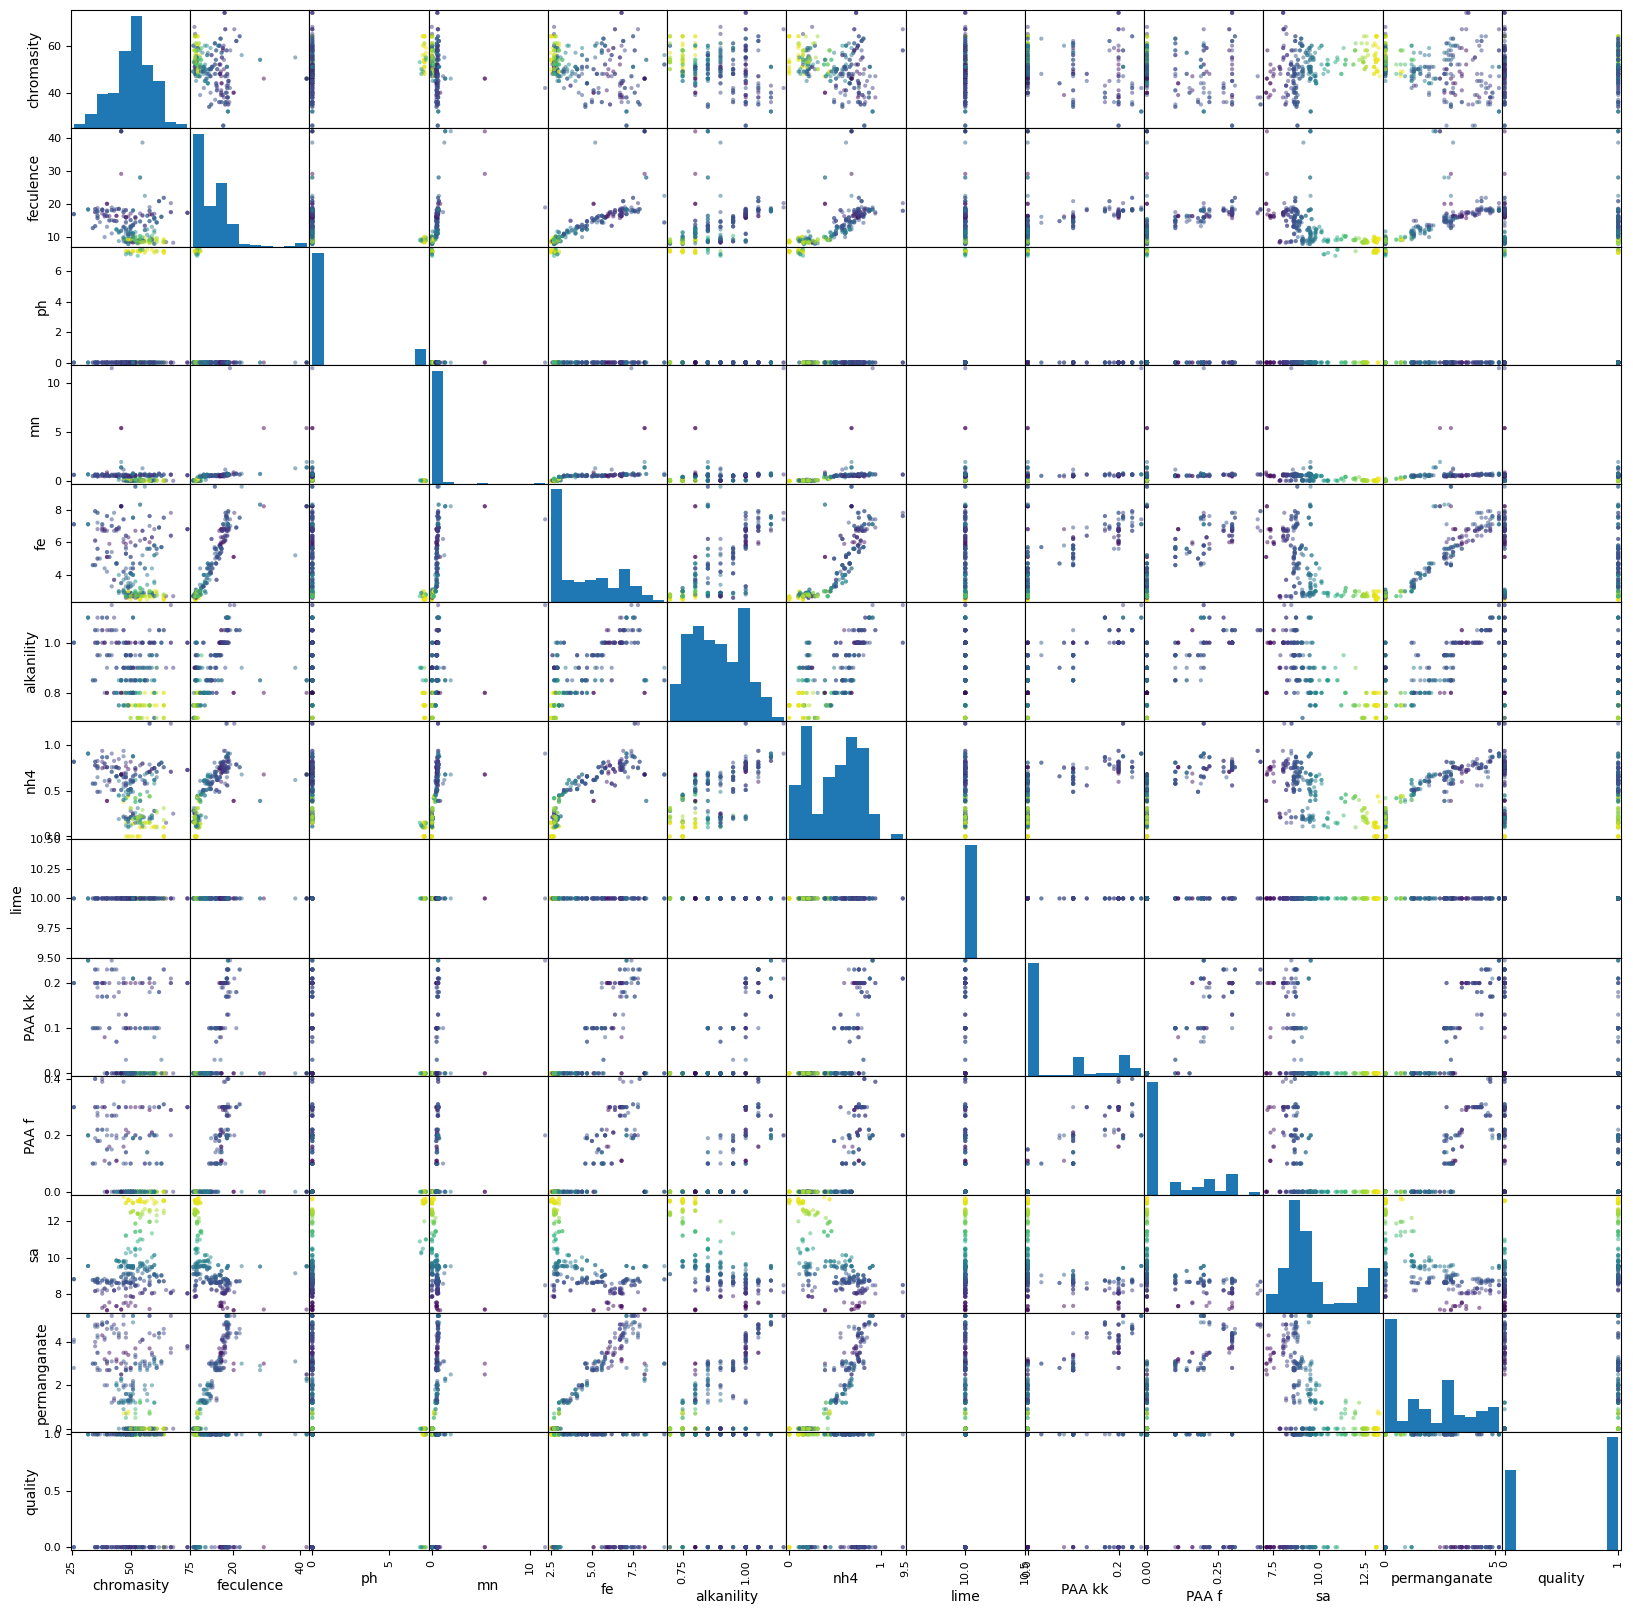

In [35]:
pd.plotting.scatter_matrix(df_new, c=df_new["sa"], figsize=(20,20), alpha=0.5)
plt.show()

In [36]:
# pd.plotting.scatter_matrix(df_new, c=df_new["oca"], figsize=(20,20), alpha=0.5)
# plt.show()

In [37]:
df_new

,chromasity,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate,quality
0,64.0,8.5,7.3,0.00,2.6,0.70,0.00,10.0,0.00,0.0,13.140,0.0,0.0
1,64.0,8.5,7.3,0.00,2.6,0.70,0.00,10.0,0.00,0.0,13.140,0.0,0.0
2,53.0,9.0,7.3,0.00,2.6,0.75,0.00,10.0,0.00,0.0,13.110,0.0,0.0
3,53.0,9.0,7.3,0.00,2.6,0.75,0.00,10.0,0.00,0.0,13.110,0.0,0.0
4,53.0,9.0,7.3,0.00,2.6,0.75,0.00,10.0,0.00,0.0,13.110,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,67.0,20.3,0.0,0.67,7.8,1.15,1.24,10.0,0.21,0.2,8.119,5.2,0.0
300,32.0,18.4,0.0,0.68,7.1,1.10,0.91,10.0,0.25,0.2,9.556,5.2,1.0
301,32.0,18.4,0.0,0.68,7.1,1.10,0.91,10.0,0.25,0.2,9.556,5.2,1.0
302,32.0,18.4,0.0,0.68,7.1,1.10,0.91,10.0,0.25,0.2,9.556,5.2,1.0


In [38]:
df_new.describe()

,chromasity,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate,quality
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.0,304.000000,304.000000,304.000000,304.000000,304.000000
mean,50.696498,13.539025,0.933882,0.464211,4.533553,0.887007,0.488289,10.0,0.055724,0.082072,9.743490,1.867434,0.585526
std,8.312750,5.682073,2.438539,0.814304,1.866058,0.113032,0.274425,0.0,0.083726,0.117944,1.712875,1.732668,0.493443
min,26.000000,8.000000,0.000000,0.000000,2.500000,0.700000,0.000000,10.0,0.000000,0.000000,7.134000,0.000000,0.000000
25%,47.000000,9.200000,0.000000,0.070000,2.800000,0.800000,0.210000,10.0,0.000000,0.000000,8.637750,0.000000,0.000000
50%,51.000000,12.300000,0.000000,0.510000,4.000000,0.900000,0.520000,10.0,0.000000,0.000000,9.120500,1.600000,1.000000
75%,56.000000,16.500000,0.000000,0.590000,6.125000,1.000000,0.710000,10.0,0.100000,0.190000,10.346000,3.100000,1.000000
max,74.000000,41.900000,7.400000,11.560000,9.400000,1.150000,1.240000,10.0,0.250000,0.400000,13.311000,5.200000,1.000000


In [39]:
features = df_new.iloc[:, 1:-1]
labels = df_new.iloc[:, -1].astype(int)
features
labels


0      0
1      0
2      0
3      0
4      0
      ..
299    0
300    1
301    1
302    1
303    0
Name: quality, Length: 304, dtype: int32

In [41]:
# feature_sa = df.iloc[:, :-4]
# labels_sa = df.iloc[:, -4]

# feature_oca = df.iloc[:, :-3].drop('sa', axis=1)
# labels_oca = df.iloc[:, -3]

# feature_lime = df.iloc[:, :-2].drop('oca', axis=1)
# labels_lime = df.iloc[:, -2]

# feature_pg = df.iloc[:, :-1].drop('oca', axis=1)
# labels_pg = df.iloc[:, -1]

# feature_sa_full = df.drop('sa', axis=1)
# feature_oca_full = df.drop('oca', axis=1)
# feature_lime_full = df.drop('lime', axis=1)
# feature_pg_full = df.drop('permanganate', axis=1)


In [42]:
# X_train, X_test, y_train, y_test = train_test_split(feature_sa, labels_sa, shuffle=True, train_size=0.8)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, shuffle=True, train_size=0.8, random_state=42)

In [44]:
len(y_test)

61

In [45]:
y_train

269    0
211    1
197    1
75     0
177    1
      ..
188    1
71     0
106    1
270    1
102    0
Name: quality, Length: 243, dtype: int32

In [46]:
X_train

,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate
269,18.5,0.0,0.58,6.8,1.00,0.85,10.0,0.18,0.30,8.329,4.2
211,14.6,0.0,0.50,5.0,0.95,0.49,10.0,0.10,0.18,8.632,2.7
197,13.4,0.0,0.54,4.6,0.85,0.58,10.0,0.10,0.19,8.800,3.0
75,8.5,0.0,0.02,2.7,0.90,0.25,10.0,0.00,0.00,7.862,0.0
177,41.9,0.0,1.39,8.2,0.85,0.68,10.0,0.00,0.00,9.541,2.3
...,...,...,...,...,...,...,...,...,...,...,...
188,15.5,0.0,0.64,5.2,0.85,0.62,10.0,0.00,0.00,9.605,3.0
71,8.6,0.0,0.04,2.8,0.85,0.19,10.0,0.00,0.00,9.630,0.0
106,9.2,0.0,0.22,2.7,0.75,0.42,10.0,0.00,0.00,11.879,0.0
270,20.9,0.0,0.75,6.9,1.05,0.79,10.0,0.18,0.30,8.713,4.2


In [47]:
from catboost import CatBoostClassifier


model = CatBoostClassifier(iterations=10000)
model.fit(X_train, y_train,plot=True)
preds = model.predict(X_test)



c:\users\evgeny kamskov\appdata\local\programs\python\python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.000682
0:	learn: 0.6925558	total: 147ms	remaining: 24m 32s
1:	learn: 0.6919888	total: 149ms	remaining: 12m 24s
2:	learn: 0.6914104	total: 150ms	remaining: 8m 21s
3:	learn: 0.6907376	total: 152ms	remaining: 6m 18s
4:	learn: 0.6901995	total: 153ms	remaining: 5m 5s
5:	learn: 0.6895413	total: 154ms	remaining: 4m 16s
6:	learn: 0.6888453	total: 156ms	remaining: 3m 42s
7:	learn: 0.6882719	total: 157ms	remaining: 3m 16s
8:	learn: 0.6877325	total: 158ms	remaining: 2m 55s
9:	learn: 0.6871111	total: 160ms	remaining: 2m 39s
10:	learn: 0.6865875	total: 161ms	remaining: 2m 26s
11:	learn: 0.6858300	total: 162ms	remaining: 2m 14s
12:	learn: 0.6850232	total: 164ms	remaining: 2m 5s
13:	learn: 0.6845593	total: 165ms	remaining: 1m 57s
14:	learn: 0.6838099	total: 166ms	remaining: 1m 50s
15:	learn: 0.6830906	total: 168ms	remaining: 1m 44s
16:	learn: 0.6824320	total: 170ms	remaining: 1m 39s
17:	learn: 0.6818717	total: 171ms	remaining: 1m 34s
18:	learn: 0.6811281	total: 172ms	remaining:

In [48]:
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                'learning_rate' : [0.01,0.02,0.03,0.04],
                'iterations'    : [1000, 5000, 10000, 500]
                }

In [49]:
# CBC = CatBoostClassifier()

In [50]:
# Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, verbose=0)
# Grid_CBC.fit(X_train, y_train, early_stopping_rounds=10, verbose=0)

In [51]:
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
# print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
# print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

In [52]:
best_params_ = {'depth': 9, 'iterations': 1000, 'learning_rate': 0.03}

In [53]:
best_CBC = CatBoostClassifier(depth=9, iterations= 1000, learning_rate= 0.03)

In [54]:
best_CBC.fit(X_train, y_train, early_stopping_rounds=10)
preds_best = best_CBC.predict(X_test)

0:	learn: 0.6664447	total: 4.86ms	remaining: 4.85s
1:	learn: 0.6361038	total: 9.09ms	remaining: 4.54s
2:	learn: 0.6083152	total: 13.7ms	remaining: 4.54s
3:	learn: 0.5853810	total: 17.6ms	remaining: 4.38s
4:	learn: 0.5608221	total: 21.9ms	remaining: 4.37s
5:	learn: 0.5418944	total: 27.8ms	remaining: 4.6s
6:	learn: 0.5216866	total: 32.3ms	remaining: 4.58s
7:	learn: 0.5022779	total: 36.4ms	remaining: 4.51s
8:	learn: 0.4855800	total: 40.3ms	remaining: 4.43s
9:	learn: 0.4685360	total: 43.8ms	remaining: 4.33s
10:	learn: 0.4512352	total: 47.5ms	remaining: 4.27s
11:	learn: 0.4353298	total: 51.5ms	remaining: 4.24s
12:	learn: 0.4211966	total: 55.6ms	remaining: 4.22s
13:	learn: 0.4112543	total: 59.2ms	remaining: 4.17s
14:	learn: 0.3965040	total: 63.2ms	remaining: 4.15s
15:	learn: 0.3858436	total: 66.5ms	remaining: 4.09s
16:	learn: 0.3726992	total: 69.8ms	remaining: 4.04s
17:	learn: 0.3583800	total: 73.4ms	remaining: 4s
18:	learn: 0.3480549	total: 77.1ms	remaining: 3.98s
19:	learn: 0.3392775	total

In [55]:
X_train.describe()

,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate
count,243.000000,243.000000,243.000000,243.00000,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000
mean,13.540180,0.958025,0.464568,4.51893,0.885185,0.488683,10.0,0.053951,0.080000,9.740346,1.867078
std,5.679594,2.465323,0.840224,1.84576,0.112019,0.274110,0.0,0.082302,0.115444,1.703513,1.723916
min,8.000000,0.000000,0.000000,2.50000,0.700000,0.000000,10.0,0.000000,0.000000,7.134000,0.000000
25%,9.200000,0.000000,0.070000,2.80000,0.800000,0.210000,10.0,0.000000,0.000000,8.638000,0.000000
50%,12.400000,0.000000,0.520000,4.00000,0.900000,0.520000,10.0,0.000000,0.000000,9.128000,1.600000
75%,16.500000,0.000000,0.590000,6.10000,1.000000,0.710000,10.0,0.100000,0.190000,10.280000,3.100000
max,41.900000,7.400000,11.560000,9.40000,1.150000,1.240000,10.0,0.250000,0.400000,13.311000,5.200000


In [56]:
pd.DataFrame({'feature_importance': model.get_feature_importance(), 
              'feature_names': X_test.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

,feature_importance,feature_names
9,37.324807,sa
5,12.971976,nh4
3,10.755354,fe
2,10.164705,mn
10,8.216873,permanganate
...,...,...
4,6.866092,alkanility
7,3.347306,PAA kk
8,2.440265,PAA f
1,0.952293,ph


In [57]:
pd.DataFrame({'feature_importance': best_CBC.get_feature_importance(), 
              'feature_names': X_test.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

,feature_importance,feature_names
9,38.448893,sa
3,13.491850,fe
5,10.882465,nh4
2,8.848206,mn
0,7.627939,feculence
...,...,...
10,5.741322,permanganate
7,3.997094,PAA kk
8,2.505006,PAA f
1,1.710602,ph


In [58]:
model.get_feature_importance()

array([ 6.96032876,  0.95229333, 10.16470473, 10.75535396,  6.86609247,
       12.97197556,  0.        ,  3.34730599,  2.44026535, 37.32480736,
        8.2168725 ])

In [59]:
preds

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [60]:
# metrcis for classifier:
accuracy_score_pred = accuracy_score(y_test, preds)
precision_score_pred = precision_score(y_test, preds)
recall_score_pred = recall_score(y_test, preds)
accuracy_score_best = accuracy_score(y_test, preds_best)
precision_score_best = precision_score(y_test, preds_best)
recall_score_best = recall_score(y_test, preds_best)


In [61]:
pd.DataFrame([accuracy_score_pred,
precision_score_pred,
recall_score_pred,
accuracy_score_best,
precision_score_best,
recall_score_best])

,0
0,0.901639
1,0.935484
2,0.878788
3,0.934426
4,1.000000
5,0.878788


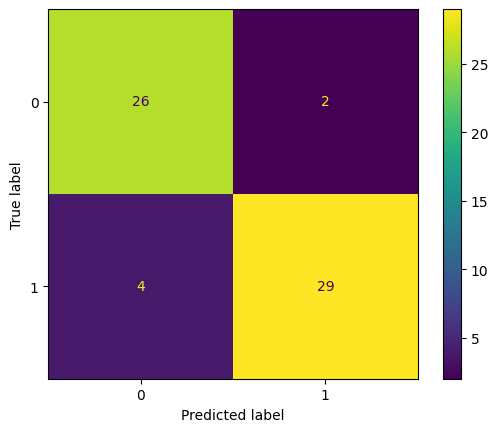

In [62]:
cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

plt.show()

In [63]:
match_ = (preds == y_test)

In [64]:
match_df = X_test.copy()

In [65]:
match_df['match'] = match_

In [66]:
match_df

,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate,match
180,29.1,0.0,5.42,8.2,0.80,0.68,10.0,0.00,0.0,7.173,3.0,True
154,12.2,0.0,0.53,3.8,0.80,0.58,10.0,0.00,0.0,9.531,1.6,True
111,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.00,0.0,11.976,0.7,True
247,17.4,0.0,0.59,6.8,1.00,0.73,10.0,0.20,0.3,8.058,3.7,True
60,8.8,0.0,0.06,3.1,1.00,0.22,10.0,0.00,0.0,9.090,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
218,14.9,0.0,0.54,5.6,0.95,0.71,10.0,0.00,0.1,8.971,2.9,True
104,9.4,0.0,0.11,2.7,0.70,0.31,10.0,0.00,0.0,12.487,0.0,True
301,18.4,0.0,0.68,7.1,1.10,0.91,10.0,0.25,0.2,9.556,5.2,True
194,12.8,0.0,0.50,4.6,0.85,0.58,10.0,0.10,0.1,8.786,3.0,True


In [67]:
match_df[match_df['match'] == False]

,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate,match
119,10.0,0.0,0.42,3.0,0.75,0.40,10.0,0.0,0.0,9.813,1.2,False
118,10.0,0.0,0.42,3.0,0.75,0.40,10.0,0.0,0.0,9.813,0.9,False
193,13.5,0.0,0.59,6.2,0.85,0.58,10.0,0.1,0.1,8.271,2.9,False
17,9.1,7.3,0.00,2.6,0.75,0.00,10.0,0.0,0.0,13.210,0.0,False
90,8.0,0.0,0.02,2.7,0.75,0.16,10.0,0.0,0.0,9.508,0.0,False
7,8.6,7.3,0.00,2.5,0.75,0.00,10.0,0.0,0.0,13.140,0.0,False


In [68]:
df_new.loc[64]

chromasity      49.00
feculence        9.20
ph               0.00
mn               0.12
fe               2.90
alkanility       0.90
nh4              0.19
lime            10.00
PAA kk           0.00
PAA f            0.00
sa               9.08
permanganate     0.00
quality          0.00
Name: 64, dtype: float64

In [69]:
match_df

,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate,match
180,29.1,0.0,5.42,8.2,0.80,0.68,10.0,0.00,0.0,7.173,3.0,True
154,12.2,0.0,0.53,3.8,0.80,0.58,10.0,0.00,0.0,9.531,1.6,True
111,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.00,0.0,11.976,0.7,True
247,17.4,0.0,0.59,6.8,1.00,0.73,10.0,0.20,0.3,8.058,3.7,True
60,8.8,0.0,0.06,3.1,1.00,0.22,10.0,0.00,0.0,9.090,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
218,14.9,0.0,0.54,5.6,0.95,0.71,10.0,0.00,0.1,8.971,2.9,True
104,9.4,0.0,0.11,2.7,0.70,0.31,10.0,0.00,0.0,12.487,0.0,True
301,18.4,0.0,0.68,7.1,1.10,0.91,10.0,0.25,0.2,9.556,5.2,True
194,12.8,0.0,0.50,4.6,0.85,0.58,10.0,0.10,0.1,8.786,3.0,True


c:\users\evgeny kamskov\appdata\local\programs\python\python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\users\evgeny kamskov\appdata\local\programs\python\python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\users\evgeny kamskov\appdata\local\programs\python\python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


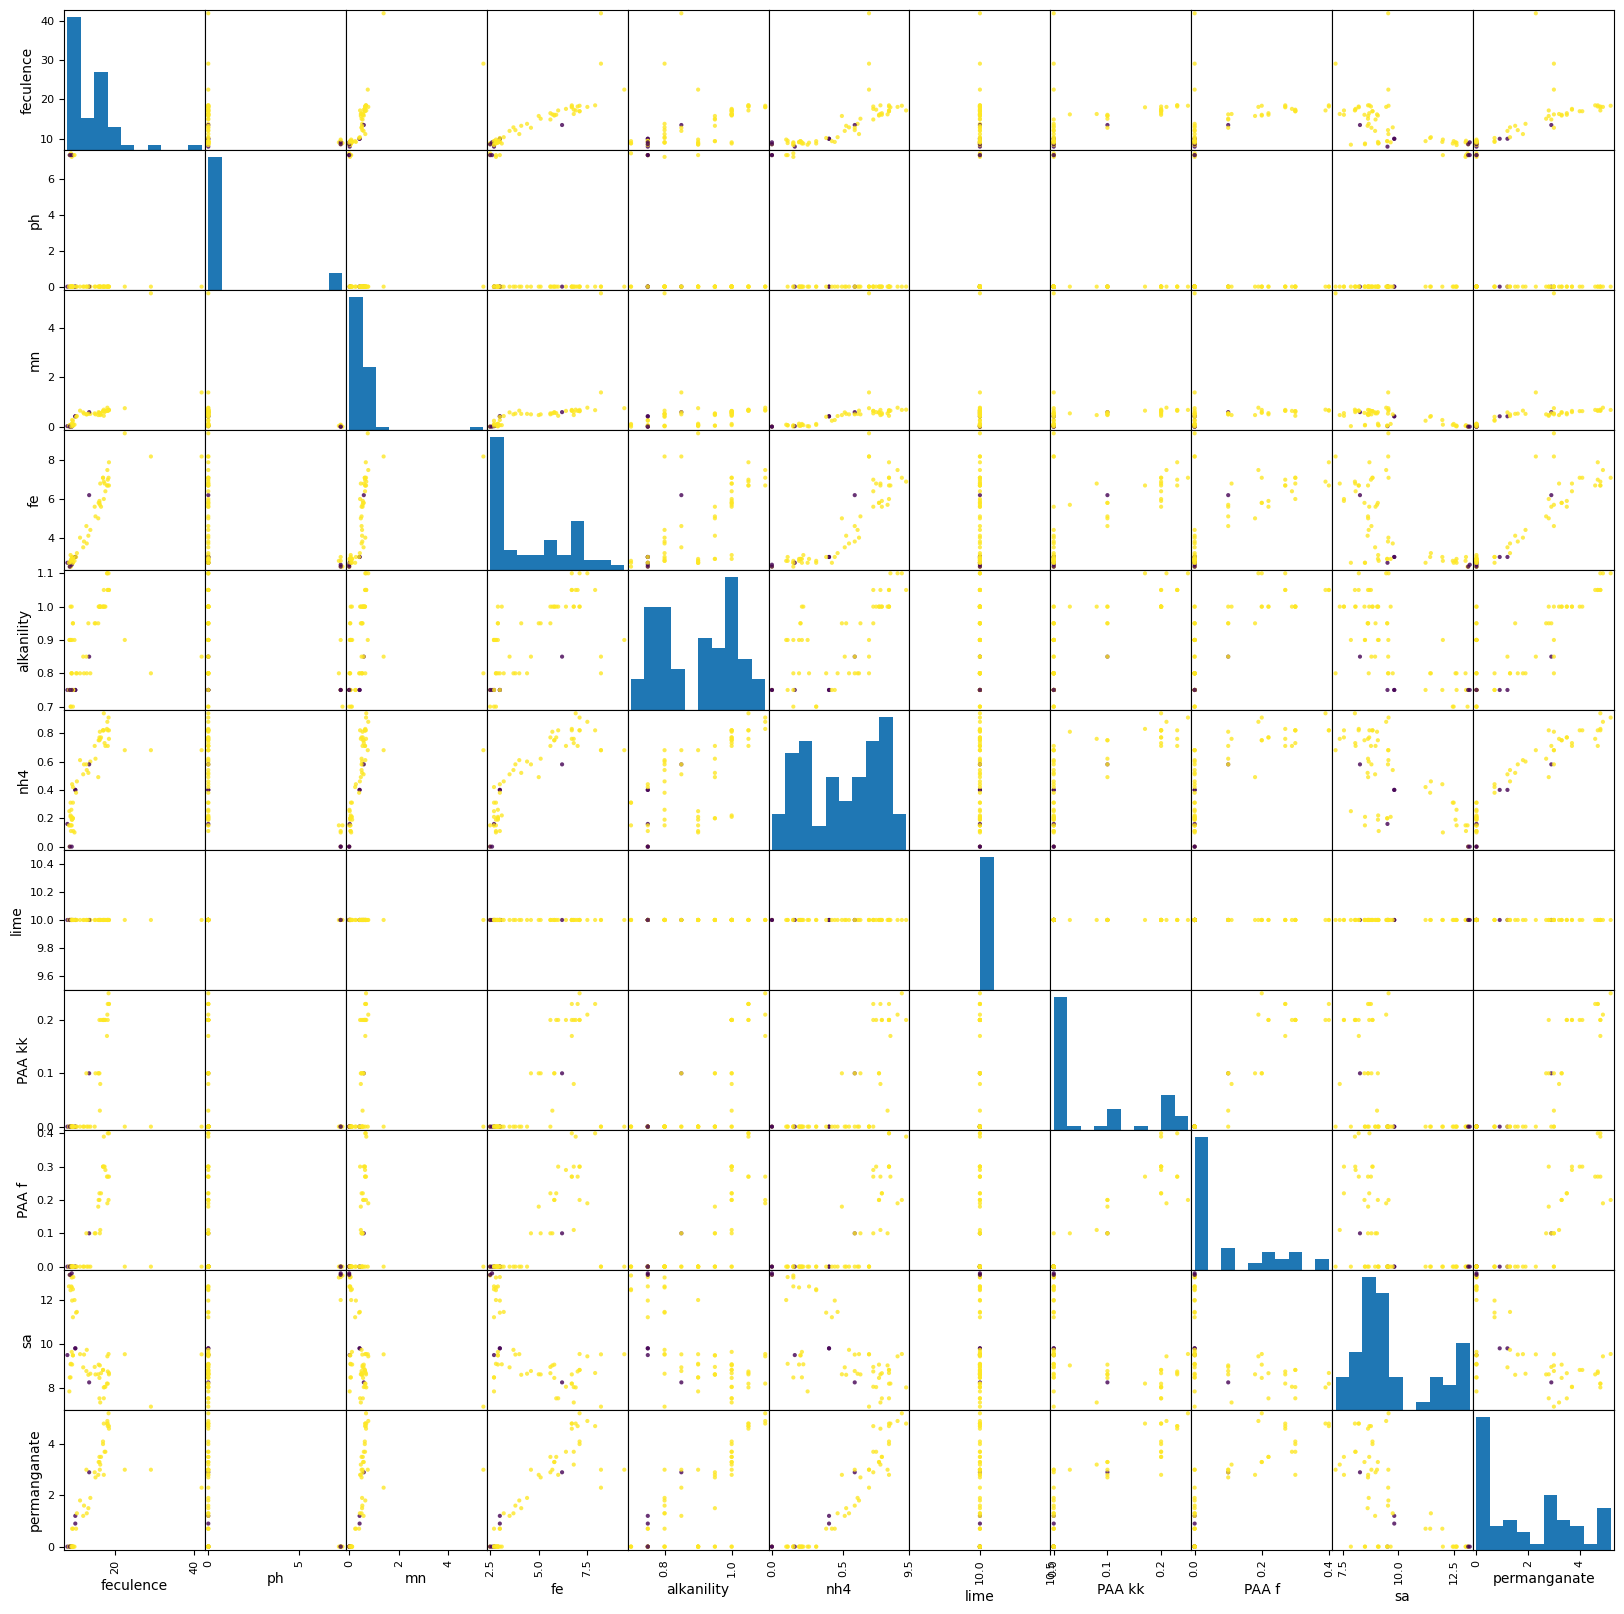

In [70]:
pd.plotting.scatter_matrix(match_df.drop('match', axis=1), c=match_df["match"].astype(int), figsize=(20,20), alpha=0.8)
plt.show()

<AxesSubplot: >

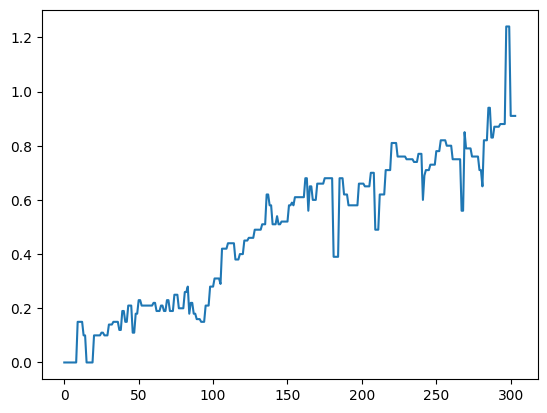

In [71]:
df_new['nh4'].plot()

<AxesSubplot: >

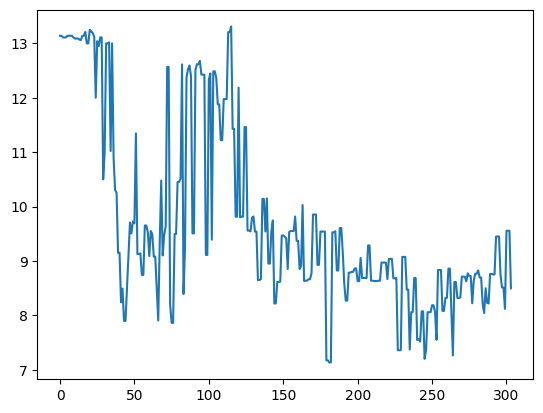

In [72]:
df_new['sa'].plot()

<AxesSubplot: >

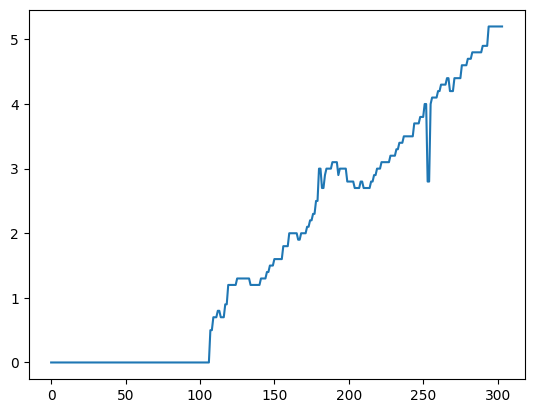

In [73]:
df_new['permanganate'].plot()

In [74]:
X_test.iloc[0]

feculence       29.100
ph               0.000
mn               5.420
fe               8.200
alkanility       0.800
nh4              0.680
lime            10.000
PAA kk           0.000
PAA f            0.000
sa               7.173
permanganate     3.000
Name: 180, dtype: float64

In [75]:
model.predict(X_test.iloc[0])

0

In [77]:
# fd_costs = pd.read_excel('Стоимость ХР на 20.03.2023.xlsx', header=1)
# fd_costs = fd_costs.iloc[[1,2,4,5]].drop(['№ лота', 'ЕИ'], axis=1)

In [78]:
fd_costs

NameError: name 'fd_costs' is not defined

In [ ]:
df_new['permanganate'].max()

5.2

In [ ]:
match_df

,chromasity,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate,match
180,46.0,29.1,0.0,5.42,8.2,0.80,0.68,10.0,0.00,0.0,7.173,3.0,True
154,49.0,12.2,0.0,0.53,3.8,0.80,0.58,10.0,0.00,0.0,9.531,1.6,True
111,58.0,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.00,0.0,11.976,0.7,True
247,74.0,17.4,0.0,0.59,6.8,1.00,0.73,10.0,0.20,0.3,8.058,3.7,True
60,47.0,8.8,0.0,0.06,3.1,1.00,0.22,10.0,0.00,0.0,9.090,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,58.0,14.9,0.0,0.54,5.6,0.95,0.71,10.0,0.00,0.1,8.971,2.9,True
104,50.0,9.4,0.0,0.11,2.7,0.70,0.31,10.0,0.00,0.0,12.487,0.0,True
301,32.0,18.4,0.0,0.68,7.1,1.10,0.91,10.0,0.25,0.2,9.556,5.2,True
194,34.0,12.8,0.0,0.50,4.6,0.85,0.58,10.0,0.10,0.1,8.786,3.0,True


In [79]:
import numpy as np

def cartesian(arrays, out=None):
    """
    Generate a Cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the Cartesian product of.
    out : ndarray
        Array to place the Cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing Cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    #m = n / arrays[0].size
    m = int(n / arrays[0].size)
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m, 1:])
        for j in range(1, arrays[0].size):
        #for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m, 1:] = out[0:m, 1:]
    return out.tolist()

In [81]:
preds = []
values = X_test.iloc[0, :-4].to_list()

w_pm = np.arange(df_new['permanganate'].min(), df_new['permanganate'].max(), (df_new['permanganate'].max()-df_new['permanganate'].min())/50)
w_sa = np.arange(df_new['sa'].min(), df_new['sa'].max(), (df_new['sa'].max()-df_new['sa'].min())/50)
w_paakk = np.arange(df_new['PAA kk'].min(), df_new['PAA kk'].max(), (df_new['PAA kk'].max()-df_new['PAA kk'].min())/50)
w_paaf = np.arange(df_new['PAA f'].min(), df_new['PAA f'].max(), (df_new['PAA f'].max()-df_new['PAA f'].min())/50)

weights = pd.DataFrame(data=[w_paakk, w_paaf, w_sa, w_pm]).T
weights.columns = [ 'paakk', 'paaf', 'sa', 'permanganate']

combos = cartesian([w_paakk, w_paaf, w_sa, w_pm])

weights_combo = pd.DataFrame(data=combos, columns=['PAA kk', 'PAA f', 'sa', 'permanganate'])
# single_features_weights = X_test.iloc[0, :-4].to_frame().T.merge(weights_combo, how='cross')
for i in combos:
    model.predict(values + i)
# preds = model.predict(single_features_weights)
# single_features_weights['pred'] = preds
# df_true = single_features_weights[single_features_weights['pred'] == 1]

# df_true['cost'] = df_true['sa']*fd_costs['Цена одной единицы продукции, руб. \nБЕЗ НДС'][4] + df_true['permanganate']*fd_costs['Цена одной единицы продукции, руб. \nБЕЗ НДС'][1]
# df_true.sort_values(by='cost')
preds

KeyboardInterrupt: 

In [ ]:
values = X_test.iloc[0, :-4].to_list()
res = [print([*combos, *values] for _ in combos]

In [96]:

w_pm = np.arange(df_new['permanganate'].min(), df_new['permanganate'].max(), (df_new['permanganate'].max()-df_new['permanganate'].min())/50)
w_sa = np.arange(df_new['sa'].min(), df_new['sa'].max(), (df_new['sa'].max()-df_new['sa'].min())/50)
w_paakk = np.arange(df_new['PAA kk'].min(), df_new['PAA kk'].max(), (df_new['PAA kk'].max()-df_new['PAA kk'].min())/50)
w_paaf = np.arange(df_new['PAA f'].min(), df_new['PAA f'].max(), (df_new['PAA f'].max()-df_new['PAA f'].min())/50)

weights = pd.DataFrame(data=[w_paakk, w_paaf, w_sa, w_pm]).T
weights.columns = [ 'paakk', 'paaf', 'sa', 'permanganate']

combos = cartesian([w_paakk, w_paaf, w_sa, w_pm])

weights_combo = pd.DataFrame(data=combos, columns=['PAA kk', 'PAA f', 'sa', 'permanganate'])
single_features_weights = X_test.iloc[2, :-4].to_frame().T.merge(weights_combo, how='cross')

preds = model.predict(single_features_weights)
single_features_weights['pred'] = preds
df_true = single_features_weights[single_features_weights['pred'] == 1]

df_true['cost'] = df_true['sa']*111 + df_true['permanganate']*222
df_true.sort_values(by='cost')

c:\users\evgeny kamskov\appdata\local\programs\python\python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Evgeny Kamskov\AppData\Local\Temp\ipykernel_22312\2815453407.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['cost'] = df_true['sa']*111 + df_true['permanganate']*222


,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate,pred,cost
783600,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.030,0.104,9.85188,0.000,1,1093.55868
2013600,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.080,0.040,9.85188,0.000,1,1093.55868
3061100,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.120,0.192,9.85188,0.000,1,1093.55868
1153600,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.045,0.088,9.85188,0.000,1,1093.55868
3308600,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.130,0.184,9.85188,0.000,1,1093.55868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6079999,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.240,0.248,13.18746,5.096,1,2595.12006
424999,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.015,0.152,13.18746,5.096,1,2595.12006
2749999,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.105,0.392,13.18746,5.096,1,2595.12006
5029999,9.2,0.0,0.27,3.0,0.75,0.44,10.0,0.200,0.088,13.18746,5.096,1,2595.12006


In [95]:
df_true.iloc[0].to_frame().T

,feculence,ph,mn,fe,alkanility,nh4,lime,PAA kk,PAA f,sa,permanganate,pred,cost
600,29.1,0.0,5.42,8.2,0.8,0.68,10.0,0.0,0.0,8.61648,0.0,1.0,956.42928


In [97]:
df_true.sort_values(by='cost').iloc[0, -6:]

PAA kk             0.03000
PAA f              0.10400
sa                 9.85188
permanganate       0.00000
pred               1.00000
cost            1093.55868
Name: 783600, dtype: float64